## 이미지 처리 딥러닝
# Cifar10 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
(X_train, y_train),(X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
X_train.dtype, X_train.max(), X_train.min()

(dtype('uint8'), 255, 0)

In [6]:
help(keras.datasets.cifar10.load_data)

Help on function load_data in module tensorflow.python.keras.datasets.cifar10:

load_data()
    Loads [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
        **x_train, x_test**: uint8 arrays of RGB image data with shape
          `(num_samples, 3, 32, 32)` if `tf.keras.backend.image_data_format()` is
          `'channels_first'`, or `(num_samples, 32, 32, 3)` if the data format
          is `'channels_last'`.
    
        **y_train, y_test**: uint8 arrays of category labels
          (integers in range 0-9) each with shape (num_samples, 1).



### 데이터 전처리

In [7]:
# 0~1 사이의 값으로 바꾼다
X_train = X_train/255
X_test = X_test/255

# 원핫인코딩 적용
# keras.utils.to_categorical()
y_train = np.eye(10)[y_train.ravel()]
y_test = np.eye(10)[y_test.ravel()]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [22]:
labels = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

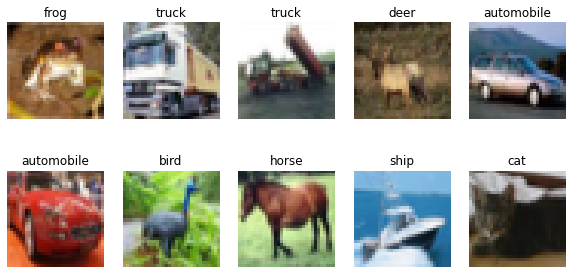

In [10]:
plt.figure(figsize=[10,5])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(labels[y_train[i].argmax()])

### CNN 적용

In [8]:
from tensorflow import keras

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
            activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['acc'])

In [14]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20,
                   validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 7s 20ms/step - loss: 1.8837 - acc: 0.3303 - val_loss: 1.4573 - val_acc: 0.4804
Epoch 2/20
313/313 [==============================] - 5s 17ms/step - loss: 1.3553 - acc: 0.5307 - val_loss: 1.3436 - val_acc: 0.5358
Epoch 3/20
313/313 [==============================] - 5s 16ms/step - loss: 1.2492 - acc: 0.5678 - val_loss: 1.2366 - val_acc: 0.5757
Epoch 4/20
313/313 [==============================] - 5s 16ms/step - loss: 1.1660 - acc: 0.5987 - val_loss: 1.2680 - val_acc: 0.5575
Epoch 5/20
313/313 [==============================] - 5s 16ms/step - loss: 1.1213 - acc: 0.6140 - val_loss: 1.1695 - val_acc: 0.5914
Epoch 6/20
313/313 [==============================] - 5s 16ms/step - loss: 1.0703 - acc: 0.6309 - val_loss: 1.1607 - val_acc: 0.5994
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 1.0191 - acc: 0.6498 - val_loss: 1.1506 - val_acc: 0.6065
Epoch 8/20
313/313 [==============================] - 5s 17ms/step - 

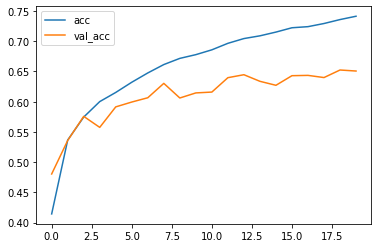

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### 중간층 추가

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), padding='same',
                    input_shape=(32,32,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Conv2D(64, (3,3), padding='same',
                    activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Conv2D(128, (3,3), padding='same',
                    activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25)) # 25% 를 누락

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # 50% 를 누락
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['acc'])

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10,
                   validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 18s 48ms/step - loss: 2.0708 - acc: 0.2252 - val_loss: 1.5413 - val_acc: 0.4501
Epoch 2/10
313/313 [==============================] - 10s 31ms/step - loss: 1.5681 - acc: 0.4247 - val_loss: 1.3340 - val_acc: 0.5227
Epoch 3/10
313/313 [==============================] - 10s 31ms/step - loss: 1.4035 - acc: 0.4922 - val_loss: 1.1728 - val_acc: 0.5882
Epoch 4/10
313/313 [==============================] - 10s 30ms/step - loss: 1.2844 - acc: 0.5395 - val_loss: 1.1904 - val_acc: 0.5779
Epoch 5/10
313/313 [==============================] - 12s 37ms/step - loss: 1.2333 - acc: 0.5613 - val_loss: 1.0322 - val_acc: 0.6417
Epoch 6/10
313/313 [==============================] - 11s 37ms/step - loss: 1.1417 - acc: 0.5959 - val_loss: 0.9802 - val_acc: 0.6585
Epoch 7/10
313/313 [==============================] - 11s 35ms/step - loss: 1.0944 - acc: 0.6163 - val_loss: 0.9191 - val_acc: 0.6808
Epoch 8/10
313/313 [==============================] - 11s 35ms

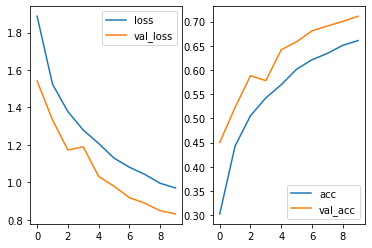

In [20]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

In [23]:
model.save('cifar10_model_1.h5')  # creates a HDF5 file

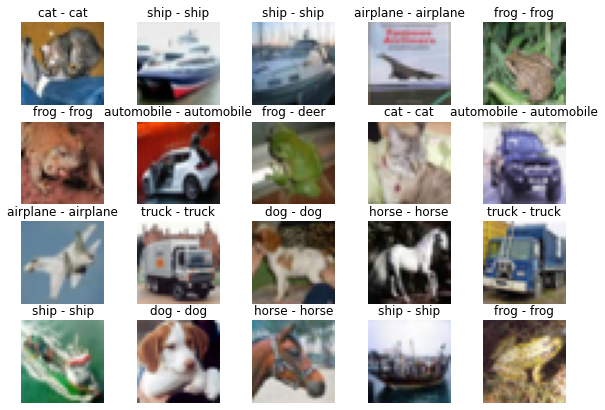

In [25]:
y_pred = model.predict(X_test[:20])
plt.figure(figsize=[10,7])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(labels[np.argmax(y_test[i])] + ' - ' +
              labels[np.argmax(y_pred[i])])